# Course Final Project

### Student name: <font color=red>Arkan Jbali</font>

In this project you need to practice data analysis on the dataset in the file University_score.csv, provided for that 
purpose. The data file list the university score, the Tawjihi score, the level of anxiety and the number of study hours per week for number of students. 

the data file looks like this: 

Univ_score	Study_Hours	 Anxiety	Tawjihi
62          	40	       40	      24
58          	31	      65	      20
52	            35	       34         22

For that file please do the following 

In [1]:
# Libraries needed to workout the project 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# import the file 'University_score.csv'
# and list the 1st five scores of the file 

UniversityScore = pd.read_csv('University_score.csv')
UniversityScore.head()

,Univ_score,Study_Hours,Anxiety,Tawjihi
0,62,40,40,24
1,58,31,65,20
2,52,35,34,22
3,55,26,91,22
4,75,51,46,28


In [3]:
# List all variables included in the file in addition to their data types 

UniversityScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Univ_score   20 non-null     int64
 1   Study_Hours  20 non-null     int64
 2   Anxiety      20 non-null     int64
 3   Tawjihi      20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes


In [4]:
# Change the data type of 'Anxiety' into float46
UniversityScore.dtypes


Univ_score     int64
Study_Hours    int64
Anxiety        int64
Tawjihi        int64
dtype: object

# Descriptive Analysis 

### Answer the following questions realted to descriptive analysis: 

In [5]:
#  Find the average value (mean) of all variables 

UniversityScore.mean()

Univ_score     61.00
Study_Hours    39.15
Anxiety        49.30
Tawjihi        23.20
dtype: float64

In [6]:
# write the code which gives the following output, which is the complete describtives of all variables  
UniversityScore.describe(include='all')


,Univ_score,Study_Hours,Anxiety,Tawjihi
count,20.000000,20.0000,20.000000,20.000000
mean,61.000000,39.1500,49.300000,23.200000
std,10.964056,9.0744,18.910036,3.205259
min,38.000000,25.0000,13.000000,18.000000
25%,55.000000,31.7500,37.750000,20.000000
50%,62.000000,39.5000,53.000000,24.000000
75%,68.000000,45.2500,61.000000,26.000000
max,82.000000,61.0000,91.000000,28.000000


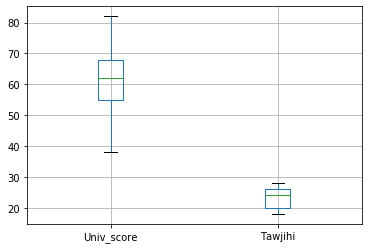

In [7]:
# write the code which generates the boxplot for noth the university score and the Tawjihi 
boxplot = UniversityScore.boxplot(column=['Univ_score', 'Tawjihi'])


# Correlation Analysis

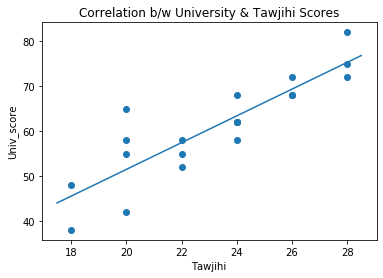

In [8]:
# draw the scattr plot between Univ_score and Tawjihi to see the realtion between these two variables looks like 


x = UniversityScore['Tawjihi']
y = UniversityScore['Univ_score']
# area = np.pi*5

# Plot

plt.scatter(x, y)
plt.title('Correlation b/w University & Tawjihi Scores')
plt.xlabel('Tawjihi')
plt.ylabel('Univ_score')

#Get the current Axes instance on the current figure
axes = plt.gca()
# np.ployfit pndarray, shape (deg + 1,) or (deg + 1, K)
# Polynomial coefficients, highest power first. If y was 2-D, 
# the coefficients for k-th data set are in p[:,k].
m, b = np.polyfit(x, y, 1)
#Y= mx + b ->  intercept(b) and slope(m)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-')
    
plt.show()




comment on the scatter plot .... what can you say about the relation between Univ_score and Tawjihi
### - There is a moderate positive relationship between the university & tawjihi scores, we can notice that when the tawjihi score high the university may could be high too.





In [9]:
# what you see below are correlations between the different variables included in the data set 

UniversityScore.corr(method = 'pearson')

# use the table to answer the question the follows 
# important remark: please execlude the correation between the variable and itself, since this is always 1, e.g. 
# correlation between Univ_score and Univ_score = 1, .... 

,Univ_score,Study_Hours,Anxiety,Tawjihi
Univ_score,1.000000,0.821011,-0.118296,0.871636
Study_Hours,0.821011,1.000000,-0.339504,0.731773
Anxiety,-0.118296,-0.339504,1.000000,-0.244178
Tawjihi,0.871636,0.731773,-0.244178,1.000000


1- Which two variables have the highest positive correlation?
   <font color=blue>
   - We saw that there is a strong relationship between University & Tawjihi scores. = 0.871636
    </font>
    
2- Which two variables has the highest negative correlation?
   <font color=blue>
   - We saw that there is very weak relationship between the study hours & anxiety = -0.339504
   </font>
   
3- Which variable has the highest correlation with the Univ_score?
   <font color=blue>
   - We saw that there is a strong relationship between University & Tawjihi scores. = 0.871636
   </font>
   
4- Which variable has the lowest impact on the Univ_score?
   <font color=blue>
   - Anxiety = -0.118296, probably, there is no relationship between them.
   </font>
   
5- what happens to your Univ_score if you study more hours?
   <font color=blue>
   - Will be increased because its also has a high correlation which also can be affected. = 0.821011
   </font>
   

# Regression Analysis 

In this part you are supposed to do a regression analysis for the data included in the data file.
try to do regression analysis for the equation
   <font color=red>
   - Univ_score = constant + (coef1 * Tawjihi) + (coef2 * Study_Hours) + (coef3 * Anxiety)
   </font>
      
The analysis is done and you are supposed to answer the questions that follow ...
    

In [10]:
# from sklearn linear models, import linear regression module 

from sklearn.linear_model import LinearRegression 

In [11]:
# for this example. create a linear regression object 

lr = LinearRegression()

In [12]:
# Select the Y which is Univ_score 
# and 
# Select the X variables which are Tawjihi, Study_Hours, and Anxiety 

Y = UniversityScore['Univ_score']
X = UniversityScore[['Tawjihi', 'Study_Hours', 'Anxiety']]


In [13]:
from sklearn.model_selection import train_test_split


xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size = 0.6)

# perform the linear regression 

lr.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# to see the model intercept ...
lr.intercept_

-17.222067439596835

In [15]:
# to see the model coefficients ...
lr.coef_

array([2.68250304, 0.26465841, 0.12777876])

## Based on that answer the following questions ...

### 1- what is the coefficient of the Tawjihi variable

In [16]:

coefVariables = pd.DataFrame(list(zip(xTrain.columns, lr.coef_)), columns=['variable','estimates'])
coefTawjihi = coefVariables["variable"][0] + ' -> Coefficient is: ', coefVariables["estimates"][0]
print(coefTawjihi)

('Tawjihi -> Coefficient is: ', 2.68250304028563)


### 2- what is the coefficient of the Study_Hours variable 

In [17]:
coefStudyHours = coefVariables["variable"][1] + ' -> Coefficient is: ', coefVariables["estimates"][1]
print(coefStudyHours)

('Study_Hours -> Coefficient is: ', 0.26465840680426167)


### 3- what is the coefficient of the Anxiety variable 

In [18]:
coefAnxiety = coefVariables["variable"][2] + ' -> Coefficient is: ', coefVariables["estimates"][2]
print(coefAnxiety)

('Anxiety -> Coefficient is: ', 0.12777875968089203)


### 4- write down the complete formula for Univ_score variable, as a function of the other three variables

### 5- suppose that a student has the following records for the different variables used in the study...
  - Tawjihi = 25
  - Study_Hours = 30
  - Anxiety = 50
#### Use the extracted formula to calculate its Univ_score 

In [19]:
Univ_score = lr.intercept_ +  (coefTawjihi[1] * 25)  + (coefStudyHours[1] * 30) + (coefAnxiety[1] * 50)
Univ_score

64.16919875571637

# Prediction Part

In [20]:
# Making prediction using the testing set 

yPred = lr.predict(xTest)
print(yPred)

[43.81282792 73.62360972 55.2376747  65.53884614 55.40052151 62.52712757
 54.01485876 60.30198515]


In [21]:
# to calculate the coefficient of determination (r2) score 
from sklearn.metrics import r2_score
R2 = r2_score(yTest, yPred)
R2

0.6594500624112198

In [22]:
df = pd.DataFrame({'Actual': yTest, 'Predicted': yPred})
df

,Actual,Predicted
6,38,43.812828
9,68,73.623610
14,65,55.237675
11,62,65.538846
2,52,55.400522
10,62,62.527128
7,55,54.014859
3,55,60.301985


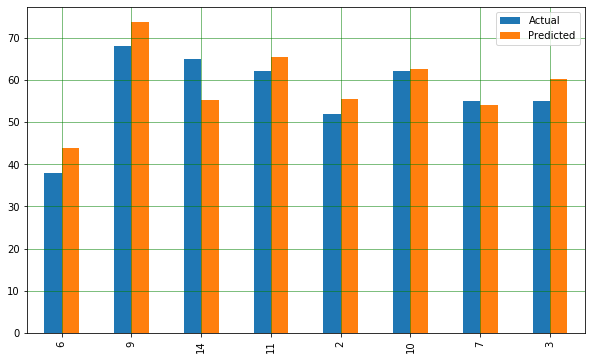

In [23]:
df.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()